There is an interesting correspondence to the two most common classification algorithms: Neural Network and Support Vector Machine. They all started from the layered problem with 2 Linearly Separable Classes, followed by 2 Almost Linear Separable Classes, to the problem with many classes and problems with non -linear borders. The correspondence is given in the table below:

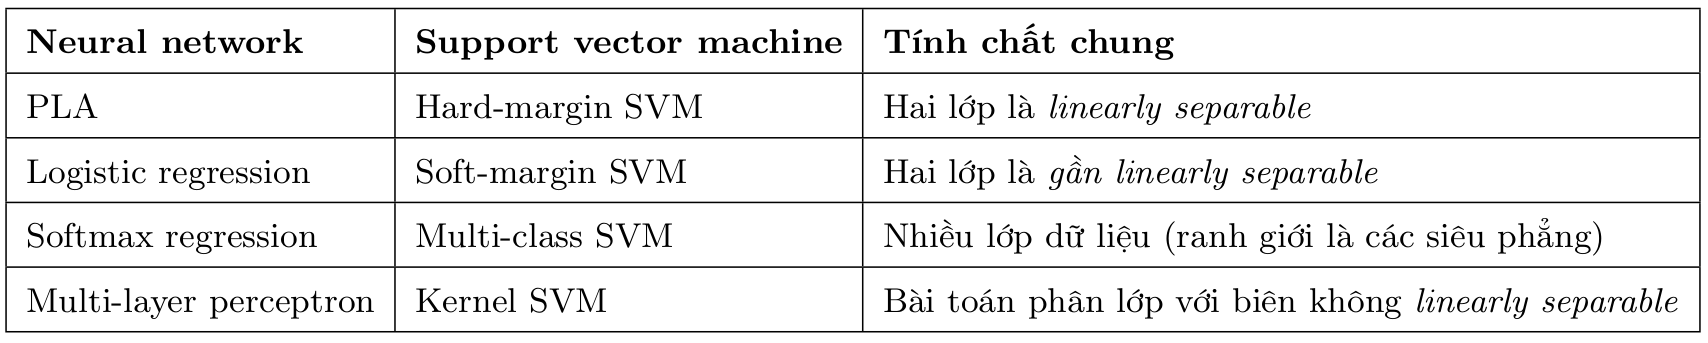

_Figure 1: Correspondence between Neural Network and Support Vector Machine_

In this chapter, we discuss Kernel SVM, which is the application of SVM on the problem where the data between two layers is completely not Linear Separable. The problem of distinguishing multiple layers of data will be discussed in the next chapter.

The basic idea of ​​Kernel SVM and Kernel methods in general is to find a non-Linearly Separable data transformation in a new space to a new space. In this new space, the data becomes Linearly Separable or near Linearly Separable, and so the classification problem can be solved by Hard/Soft-Margin SVM:

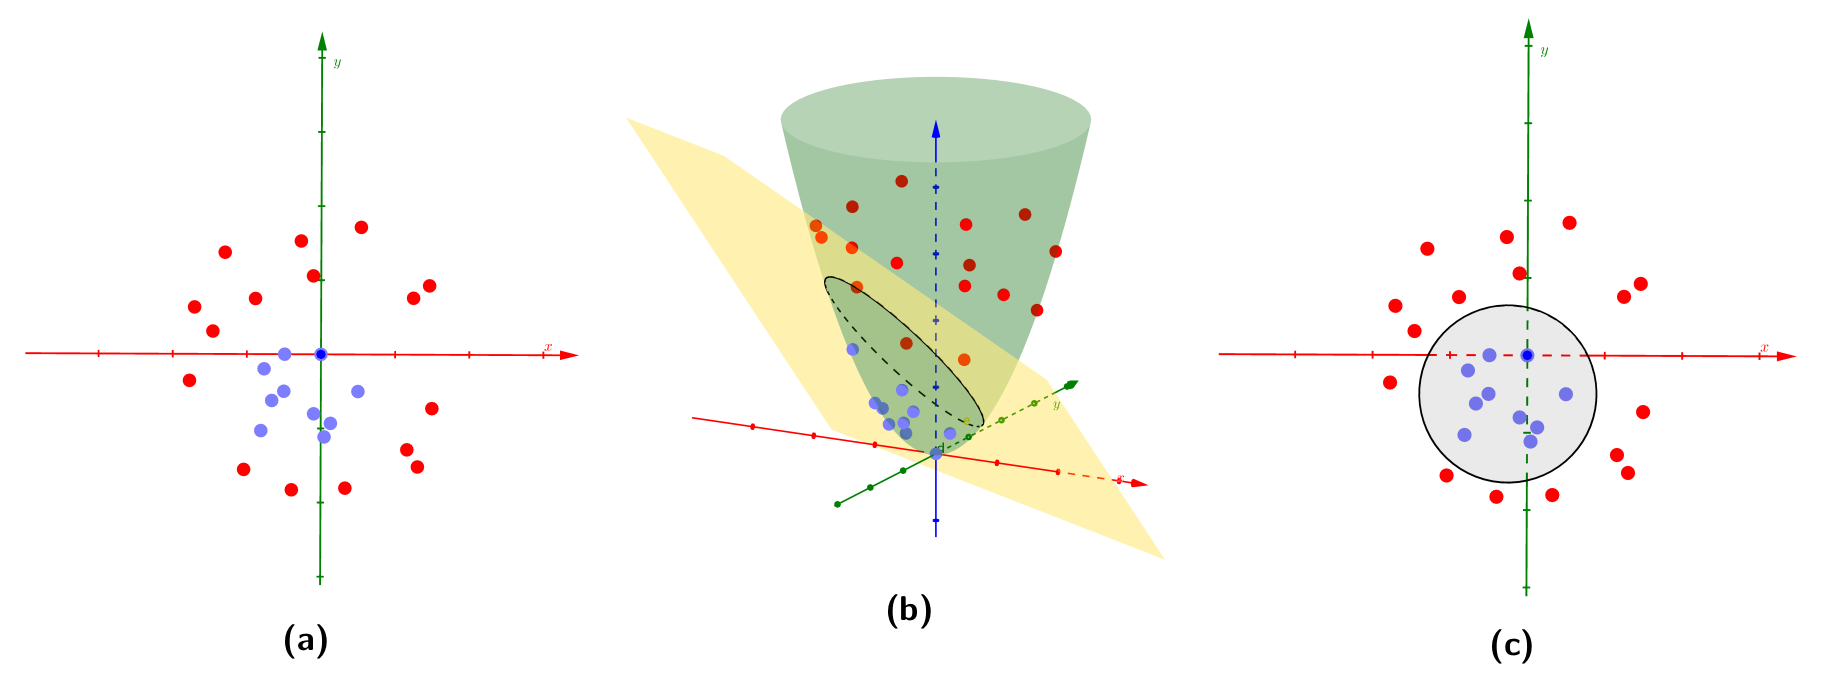

_Example of Kernel SVM. a) The data of two classes are not linearly distinguishable in two-dimensional space. b) If we consider the third dimension as a function of the other two dimensions $z = x^2 + y^2$, the data points will be distributed on a parabolic plane and have become linearly distinguishable. The yellow plane is the dividing plane, which can be found by Hard/Soft Margin SVM. c) The intersection of the found plane and the parabolic plane is an ellipse, when projecting all the data as well as this ellipse onto the original two-dimensional space, we have found the dividing line between the two classes._

Mathematically speaking, kernel SVM is a method to find a function that transforms data $\mathbf{x}$ from the original feature space into data in a new space using a function $\Phi(\mathbf{x})$. In this example, the $\Phi(.)$ function simply introduces a new data dimension that is a function of the known feature components. This function must satisfy: in the new space, the data between the two classes is linearly separable or nearly linearly separable. In this case, we can use conventional linear classifiers such as PLA, logistic regression, or hard/soft margin SVM.

$\Phi(\mathbf{x})$ functions often produce new data with higher dimensions than the original data, even infinite dimensions. If we calculate these functions directly, we will definitely encounter problems with memory and computational performance. One approach is to use kernel functions that describe the relationship between any two data points in the new space, instead of directly calculating the transformation of each data point in the new space. This technique is built on the observation of the dual problem of hard/soft margin SVM.

If we have to compare, we can see that kernel functions have similar functions to activation functions in neural networks because they both help solve problems with non-linearly separable data.

# Mathematical Foundation

Let me repeat the duality problem in Soft Margin SVM for near-linearly discriminant data:

$$
\begin{align*}
     \lambda &= \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m \mathbf{x}_n^T \mathbf{x}_m\newline
     \text{subject to:}~ & \sum_{n=1}^N \lambda_ny_n = 0 \tag{1}\newline
     & 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N 
 \end{align*}
$$

in which:
- $N$: the number of pairs of training data points.
- $\mathbf{x}_n$: the feature vector of $n$-th data in training set.
- $y_n$: the label of $n$-th data, either $1$ or $-1$.
- $\lambda_n$: the Lagrange multiplier of $n$-th data.
- $C$: the positive constant balances the size of the margin and the sacrifice of points in the unsafe zone. When $C = \infty$, the problem becomes Hard Margin SVM.

After solving $\lambda$ for problem $(1)$, the label of a new data point will be determined by the sign of the following expression:

$$\text{class}(\mathbf{x}) = \text{sgn}\left\{ \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x} + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T\mathbf{x}_n\right) \right\}\tag{2}$$

in which:
- $\mathcal{M}$ = $\{n: 0 < \lambda_n < C\}$ is the set of points laid on the margin.
- $\mathcal{S}$ = $\{n: 0 < \lambda_n\}$ is the set of support vectors.
- $N_{\mathcal{M}}$ is the number of points laid on the margin.

With real data, it is very difficult to get data that is nearly linearly differentiable, so the solution to $(1)$ may not actually produce a good classifier. Suppose that we can find a function $\Phi(.)$ such that after being transformed into the new space, each data point $\mathbf{x}$ becomes $\Phi(\mathbf{x})$, and in this new space, the data becomes nearly linearly differentiable. In this case, we hope that the solution to the soft-margin SVM problem will give us a better classifier.

In new space, the problem $(1)$ becomes:

$$
\begin{align*}
     \lambda &= \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m \Phi(\mathbf{x}_n)^T \Phi(\mathbf{x}_m)\newline
     \text{subject to:}~ & \sum_{n=1}^N \lambda_ny_n = 0 \tag{3}\newline
     & 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N 
 \end{align*}
$$

and the label of a new data point will be determined by the sign of the following expression:

$$\mathbf{w}^T\Phi(\mathbf{x}) + b = \sum_{m \in \mathcal{S}} \lambda_m y_m \Phi(\mathbf{x}_m)^T \Phi(\mathbf{x}) + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \Phi(\mathbf{x}_m)^T\Phi(\mathbf{x}_n)\right)\tag{4}$$

As mentioned above, directly computing $\Phi(\mathbf{x})$ for each data point can be very memory-intensive and time-consuming because the dimensionality of $\Phi(\mathbf{x})$ is often very large, perhaps infinite. Furthermore, to find the label of a new data point $\mathbf{x}$, we have to find its transformation $\Phi(\mathbf{x})$ in the new space and then take its dot product with all $\Phi(\mathbf{x}_m)$ with $m$ in the support set. To avoid this, we observe the following interesting thing.

In problem $(3)$ and expression $(4)$, we do not need to directly calculate $\Phi(\mathbf{x})$ for every data point. We only need to calculate $\Phi(\mathbf{x})^T \Phi(\mathbf{z})$ based on any two data points $\mathbf{x}, \mathbf{z}$. Therefore, we do not need to define a function $\Phi(.)$ but only need to define a function $k(\mathbf{x}, \mathbf{z}) = \Phi(\mathbf{x})^T\Phi(\mathbf{z})$. This technique is also known as the kernel trick. Methods based on this technique, that is, instead of directly calculating the coordinates of a point in the new space, we calculate the dot product between two points in the new space, are collectively called kernel methods.

Now, by defining the kernel function:

$$k(\mathbf{x}, \mathbf{z}) = \Phi(\mathbf{x})^T\Phi(\mathbf{z})$$

We can rewrite problem $(3)$ and expression $(4)$ as follows:

$$
\begin{align*}
    \lambda &= \arg \max_{\lambda} \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m k(\mathbf{x}_n,\mathbf{x}_m)\newline
    \text{subject to:}~ & \sum_{n=1}^N \lambda_ny_n = 0 \tag{5}\newline
    & 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N
\end{align*}
$$

and

$$\sum_{m \in \mathcal{S}} \lambda_m y_m k(\mathbf{x}_m, \mathbf{x}) + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m k(\mathbf{x}_m, \mathbf{x}_n)\right)\tag{6}$$

## Example

Consider the transformation of a data point in two-dimensional space $\mathbf{x} = [x_1, x_2]^T$ into a point in five-dimensional space $\Phi(\mathbf{x}) = [1, \sqrt{2} x_1, \sqrt{2} x_2, x_1^2, \sqrt{2} x_1x_2, x_2^2]^T$. The kernel function $k(\mathbf{x}, \mathbf{z})$ is defined as:

$$
\begin{align*}
\Phi(\mathbf{x})^T\Phi(\mathbf{z}) &= [1, \sqrt{2} x_1, \sqrt{2} x_2, x_1^2, \sqrt{2} x_1x_2, x_2^2] [1, \sqrt{2} z_1, \sqrt{2} z_2, z_1^2, \sqrt{2} z_1z_2, z_2^2]^T \newline
&= 1 + 2x_1z_1 + 2x_2z_2 + x_1^2x_2^2 + 2x_1z_1x_2z_2 + x_2^2z_2^2 \newline
&= (1 + x_1z_1 + x_2z_2)^2 = (1 + \mathbf{x}^T\mathbf{z})^2 \\
&= k(\mathbf{x}, \mathbf{z})
\end{align*}
$$

Obviously, in this example, calculating the kernel function $k(\mathbf{x}, \mathbf{z}) = (1 + \mathbf{x}^T\mathbf{z})^2$ is much simpler than calculating the transformation $\Phi(\mathbf{x})$ for each data point. In addition, the resulted value is scalar rather than instead of saving two five-dimensional vectors.

# Kernel Functions

## Property of Kernel Functions

Not just any $k(.)$ function can be used. Kernel functions should have the following properties:
- Symmetry: $k(\mathbf{x, z}) = k(\mathbf{z, x})$, because the dot product of two vectors is symmetric.
- In theory, the kernel function should satisfy the **Mercer condition**:

$$\sum_{n=1}^N \sum_{m=1}^N k(\mathbf{x}_m, \mathbf{x}_n) c_nc_m \geq 0, ~~ \forall c_i \in \mathbb{R}, i = 1, 2, \dots, N \tag{7}$$

For every finite set of vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n$. This property ensures that the objective function of the dual problem $(5)$ is convex. Indeed, if a kernel function satisfies condition $(7)$, considering $c_n = y_n \lambda_n$, we will have:

$$\lambda^T \mathbf{K} \lambda = \sum_{n=1}^N \sum_{m=1}^N k(\mathbf{x}_m, \mathbf{x}_n) y_ny_m \lambda_n \lambda_m \geq 0, ~\forall \lambda_n \tag{8}$$

where $\mathbf{K}$ is a symmetric matrix whose $n$-th row and mth column are defined by $k_{nm} = y_ny_m k(\mathbf{x}_n, \mathbf{x}_m)$. From $(8)$ we deduce that $\mathbf{K}$ is a positive semi-definite matrix. Therefore, the optimization problem $(5)$ is constrained to be convex and the objective function is a convex function (a quadratic form). Therefore, we can solve this problem efficiently.

- In practice, there are some functions $k(.)$ that do not satisfy the Merrcer condition but still give acceptable results. These functions are still called kernels. In this article, we will focus on the common kernel functions that are available in libraries.

## Several common Kernel functions

### Summary table of common kernel functions in `sklearn`

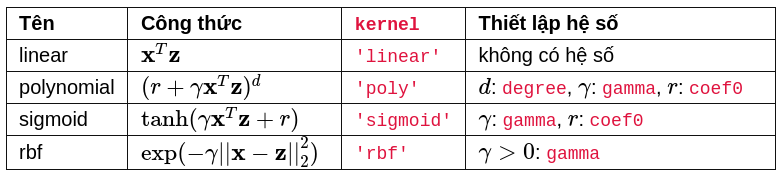

### [Self-defined Kernel functions](http://scikit-learn.org/stable/modules/svm.html#svm-kernels)

## Example

### XOR problem

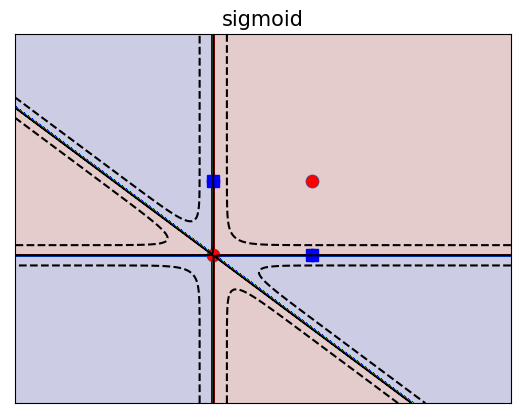

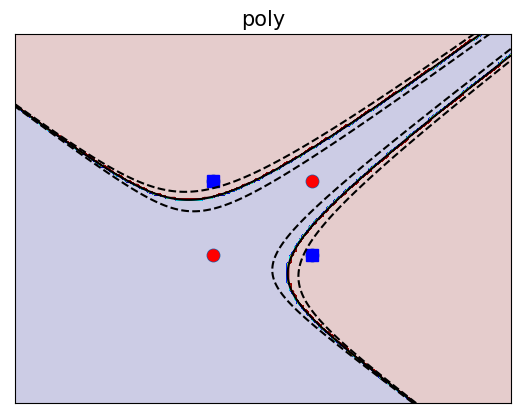

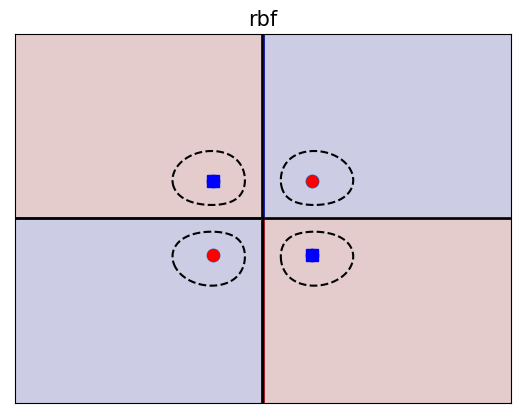

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# XOR dataset and targets
X = np.c_[(0, 0),
          (1, 1),
          #---
          (1, 0),
          (0, 1)].T
Y = [0] * 2 + [1] * 2
# figure number
fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=4, coef0 = 0) 
    # `gamma` is a parameter of the RBF, polynomial, exponential chi2 and sigmoid kernels
    # `coef0` is independent from the scale of the data, it is the intercept in the decision function

    clf.fit(X, Y)
    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(4, 3))

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80) # `s` is the size of the points
    plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
    plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)

    x_min, x_max = -2, 3
    y_min, y_max = -2, 3
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # `mgrid` is a meshgrid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # `decision_function` is the signed distance of that sample to the hyperplane
    # `ravel` is equivalent to `flatten`

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

### Near-linearly separable data

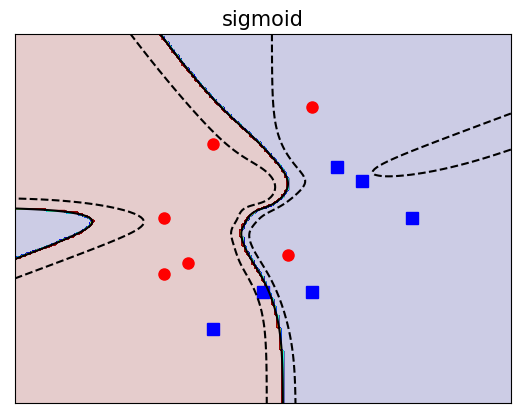

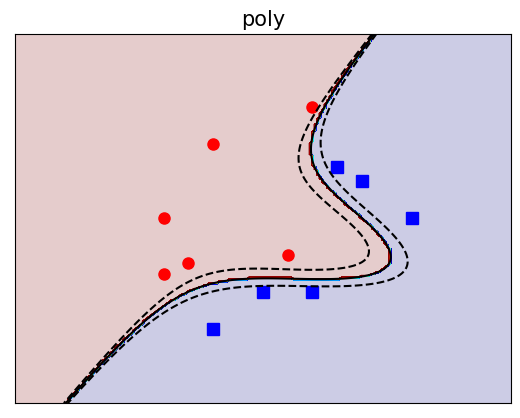

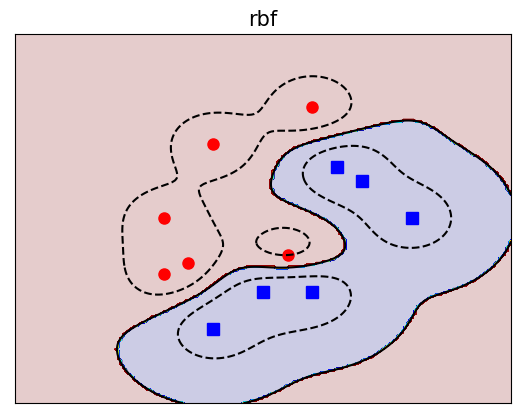

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# XOR dataset and targets
X = np.c_[(-1, -3),
          (0, -2),
          (1, -2),
          (2, 1),
          (3, 0),
          (1.5, 1.4),
          #---
          (1, 3),
          (0.5, -1),
          (-1, 2),
          (-2, -1.5),
          (-2, 0),
          (-1.5, -1.2)].T
N = 6
Y = [0] * N + [1] * N
# figure number

fignum = 1

# fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='None')
    plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 8)
    plt.plot(X[N:, 0], X[N:, 1], 'ro', markersize = 8)

    plt.axis('tight')
    x_min = -5
    x_max = 5
    y_min = -5
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

### Kernel SVM for MNIST

In [31]:
import numpy as np
from sklearn import svm
from sklearn.datasets import fetch_openml

data_dir = '/home/letruongzzio/Documents/Data Science/Machine Learning/7 - Support Vector Machines'
mnist = fetch_openml('mnist_784', data_home=data_dir)

X_all = mnist.data.astype(float) / 255.0
y_all = mnist.target.astype(float)
digits = [0, 1, 2, 3]
ids = []
for d in digits:
    ids.append(np.where(y_all == d)[0])

selected_ids = np.concatenate(ids).tolist()  # Convert to list
X = X_all.loc[selected_ids]
y = y_all[selected_ids]
print("Number of samples = ", X.shape[0])

Number of samples =  28911


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 24000)

model = svm.SVC(kernel='rbf', gamma=.1, coef0 = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 94.41 %


### Gender discrimination problem

In [35]:
import scipy.io as sio
from sklearn.svm import SVC

# Provide the full path to the file
A = sio.loadmat('/home/letruongzzio/Documents/Data Science/Machine Learning/7 - Support Vector Machines/myARgender.mat') 
A = sio.loadmat('myARgender.mat') # Load data from file
X_train = A['Y_train'].T 
X_test = A['Y_test'].T 
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

clf = SVC(kernel='poly', degree = 3, gamma=1, C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

FileNotFoundError: [Errno 2] No such file or directory: '/home/letruongzzio/Documents/Data Science/Machine Learning/7 - Support Vector Machines/myARgender.mat'